needs matplotlib and shapley
# postAAR

Eine kurze Erklärung des genutzten Verfahrens um aus Punktwolken (Pfostenlöcher, etc.) mögliche Rechtecke und Gebäude zu bekommen

In diesem Beispiel werden wir nach Rechtecken mit folgender minimaler Seitenlänge und maximaler Seitenlänge und einer Abweichung von perfekten Rechtecken.
Damit werden mögliche Häuser entdeckt.
Als Datensatz wird 'datasets/pfahltest.txt' genutzt

In [1]:
maximum_length_of_side = 3
minimum_length_of_side = 1.5
max_area_diff = 0.1

Zuerst den Datensatz zum Zeigen laden

In [2]:
posts = []

with open("datasets/pfahltest.txt", 'r') as datafile:
    index = 0
    for line in datafile:
        data = line.split()
        try:
            posts.append([index, float(data[0]), float(data[1])])
            index += 1
        except ValueError:
            pass
posts

[[0, 499.8, 120.0],
 [1, 501.1, 120.4],
 [2, 502.9, 120.0],
 [3, 503.3, 120.0],
 [4, 505.3, 120.2],
 [5, 506.0, 120.1],
 [6, 507.1, 119.7],
 [7, 499.8, 121.7],
 [8, 501.2, 122.0],
 [9, 502.3, 122.5],
 [10, 503.2, 122.0],
 [11, 504.8, 121.6],
 [12, 505.7, 122.2],
 [13, 507.2, 122.0],
 [14, 499.8, 123.6],
 [15, 500.8, 124.4],
 [16, 502.4, 123.7],
 [17, 503.6, 123.7],
 [18, 504.4, 124.4],
 [19, 506.3, 124.5],
 [20, 506.9, 124.0],
 [21, 504.0, 119.6],
 [22, 504.0, 120.7],
 [23, 504.5, 122.0],
 [24, 504.5, 123.2],
 [25, 504.7, 123.9],
 [26, 504.5, 125.5],
 [27, 504.5, 126.5],
 [28, 506.5, 119.5],
 [29, 506.5, 120.7],
 [30, 506.9, 121.9],
 [31, 506.5, 122.7],
 [32, 506.8, 124.0],
 [33, 506.0, 125.6],
 [34, 506.6, 126.9],
 [35, 508.9, 119.3],
 [36, 508.6, 120.7],
 [37, 508.8, 122.4],
 [38, 508.5, 123.1],
 [39, 508.5, 124.8],
 [40, 508.9, 125.9],
 [41, 508.5, 126.7],
 [42, 504.9, 119.7],
 [43, 504.2, 120.2],
 [44, 503.1, 121.6],
 [45, 502.5, 122.0],
 [46, 501.8, 123.0],
 [47, 500.9, 123.8],
 [

Um die Punktwolke darzustellen benutzen wir matplotlib([https://matplotlib.org/])

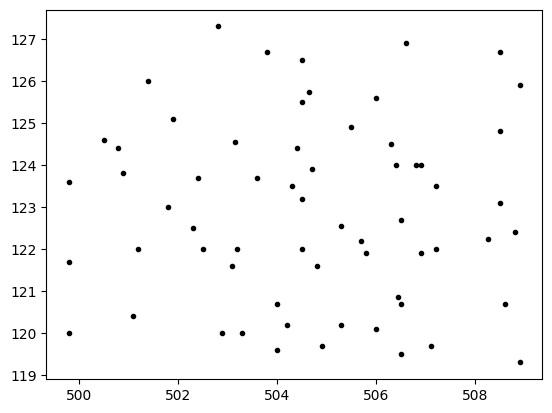

In [3]:
import matplotlib.pyplot as plt

id, x, y = zip(*posts)
plt.plot(x, y, '.', color='black')

Der Algorithmus teilt zuerst das Feld in Fenster ein, um die Komplexität der Berechnung zu verringern. (add link - sliding window)
Die Seitengröße der Fenster ist 3 * die maximale Seitenlänge der gesuchten Rechtecke -> 6

In [4]:
import src.script.algorithm.helper as hlp

windows = hlp.buildWindows(posts, maximum_length_of_side)

len(windows)

y: 118.3
x: 498.8
x: 503.3
x: 507.8
y: 122.8
x: 498.8
x: 503.3
x: 507.8
y: 127.3
x: 498.8
x: 503.3
x: 507.8


9

Die Punkte der jeweiligen Fenster

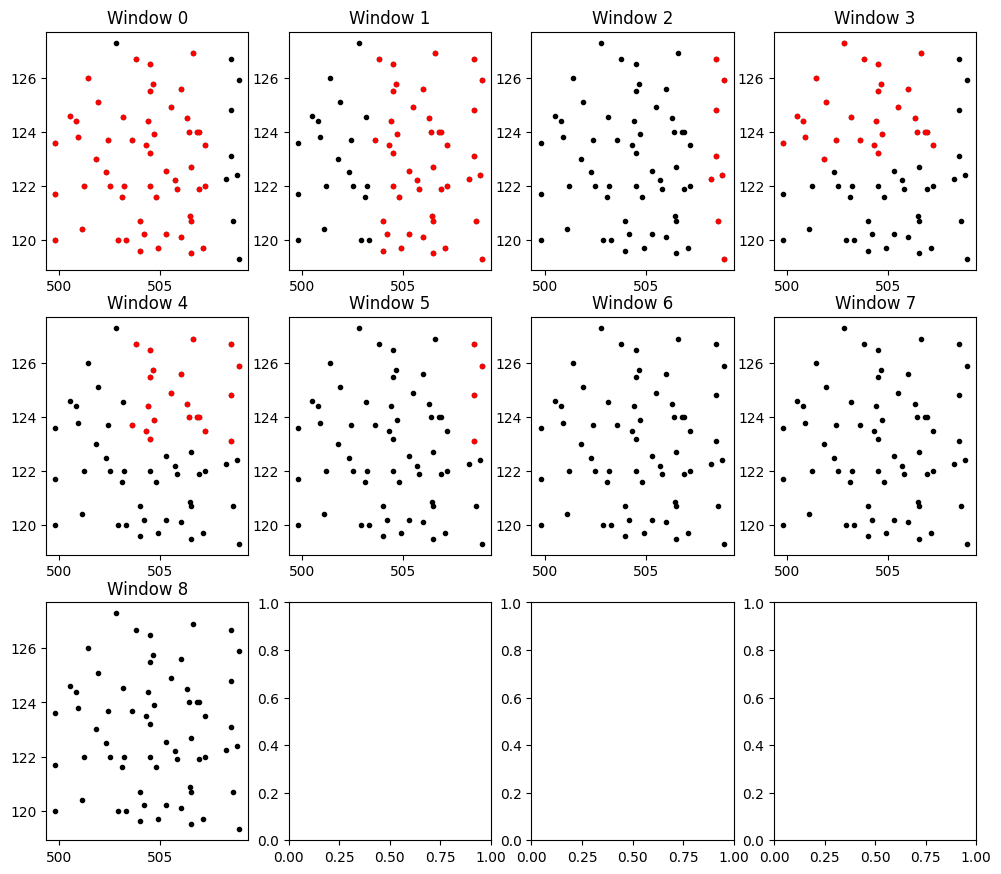

In [21]:
number_per_row = 4
fig, axs = plt.subplots((0 if len(windows)%number_per_row==0 else 1) + len(windows)//number_per_row, number_per_row, figsize=(number_per_row*3, (1 + len(windows)//number_per_row)*3))

window_number = 0
for window in windows:
    _, x, y = zip(*posts)
    axs[window_number//number_per_row, window_number%number_per_row].plot(x, y, '.', color='black')

    if len(window) > 0:
        _, x, y = zip(*list(filter(lambda post: post[0] in window, posts)))
        axs[window_number//number_per_row, window_number%number_per_row].plot(x, y, '.', color='red')

    axs[window_number//number_per_row, window_number%number_per_row].set_title('Window ' + str(window_number))

    window_number += 1

In diesen Fenstern werden nun die Rechtecke gesucht und als Liste mit einzigartigen Rechtecken zurückgegeben

In [6]:
import shapely
import src.script.algorithm.algorithm as alg

found_rects = alg.find_rects(windows, posts, maximum_length_of_side, minimum_length_of_side, max_area_diff, number_of_computercores=1)

found_rects

Calculating rects 100% - (3.095s)


[[[34, 27, 25, 20, 34], [20, 25, 27, 34, 34]],
 [[51, 49, 56, 32, 51], [32, 49, 51, 51, 56]],
 [[59, 24, 12, 20, 59], [12, 20, 24, 59, 59]],
 [[39, 38, 31, 19, 39], [19, 31, 38, 39, 39]],
 [[49, 36, 37, 31, 49], [31, 36, 37, 49, 49]],
 [[59, 53, 10, 12, 59], [10, 12, 53, 59, 59]],
 [[56, 49, 51, 20, 56], [20, 49, 51, 56, 56]],
 [[32, 26, 17, 12, 32], [12, 17, 26, 32, 32]],
 [[50, 10, 3, 5, 50], [3, 5, 10, 50, 50]],
 [[52, 32, 13, 11, 52], [11, 13, 32, 52, 52]],
 [[30, 25, 10, 4, 30], [4, 10, 25, 30, 30]],
 [[59, 32, 12, 24, 59], [12, 24, 32, 59, 59]],
 [[50, 44, 3, 5, 50], [3, 5, 44, 50, 50]],
 [[52, 50, 43, 45, 52], [43, 45, 50, 52, 52]],
 [[50, 43, 44, 24, 50], [24, 43, 44, 50, 50]],
 [[59, 57, 12, 52, 59], [12, 52, 57, 59, 59]],
 [[12, 10, 3, 5, 12], [3, 5, 10, 12, 12]],
 [[54, 47, 9, 17, 54], [9, 17, 47, 54, 54]],
 [[31, 25, 44, 4, 31], [4, 25, 31, 31, 44]],
 [[44, 42, 30, 25, 44], [25, 30, 42, 44, 44]],
 [[56, 49, 51, 32, 56], [32, 49, 51, 56, 56]],
 [[32, 30, 11, 25, 32], [11, 25

Die gefundenen Rechtecke

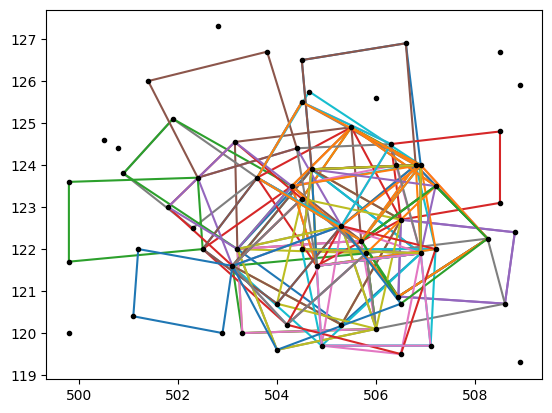

In [7]:
for rect in found_rects:
    x, y = rect.polygon.exterior.coords.xy
    plt.plot(x, y)

_, x, y = zip(*posts)
plt.plot(x, y, '.', color='black')

Es funktioniert dadurch, das die Seitenlängen kleiner bzw. größer als die Grenzwerte sind und dann die Abweichung des gefundenen Polygons vom minimal einschließenden Rechteck geringer als die des gegebenen Wertes ist.

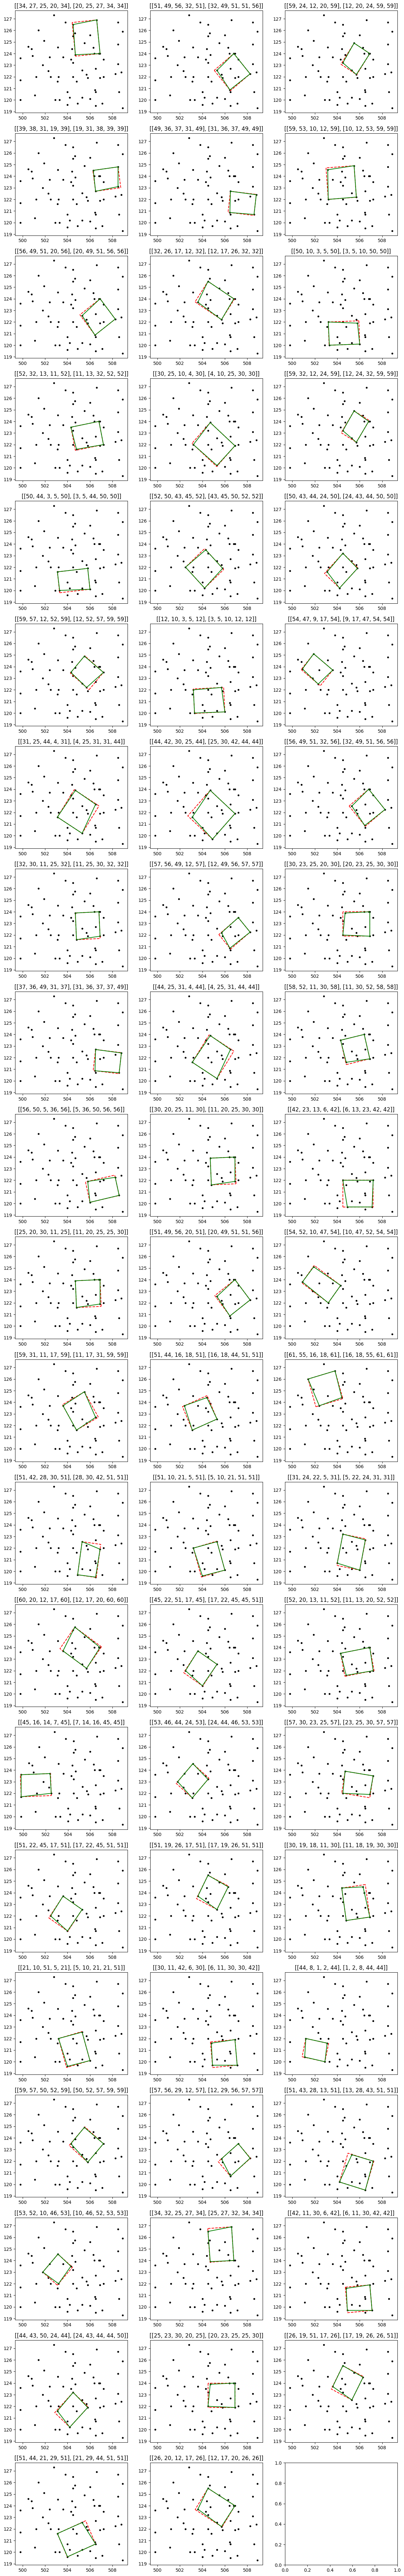

In [22]:
number_per_row = 3
fig, axs = plt.subplots(
    (0 if len(found_rects)%number_per_row==0 else 1) + len(found_rects)//number_per_row,
    number_per_row,
    figsize=(number_per_row*5, 1 + len(found_rects)//number_per_row*5))

rect_number = 0
for rect in found_rects:
    _, x, y = zip(*posts)
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, '.', color='black')

    x, y = rect.polygon.minimum_rotated_rectangle.exterior.coords.xy
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, "--", color='red')

    x, y = rect.polygon.exterior.coords.xy
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, color='green')

    axs[rect_number//number_per_row, rect_number%number_per_row].set_title(str(rect))

    rect_number += 1